In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.6.0
즉시 실행: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

16384/2194 [================================================================================================================================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [5]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp, batch_size, column_names = column_names, label_name = label_name, num_epochs = 1)

In [8]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.1, 6.8, 5.7, 6.8, 4.6, 5. , 4.8, 4.6, 7.7, 6.2, 5.7, 5.5, 4.9,
       5.7, 5. , 4.9, 5. , 7.7, 6.1, 6.7, 4.8, 6.7, 6.4, 6. , 5. , 6.2,
       4.8, 5.6, 6.5, 6.5, 5.4, 4.9], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.5, 3.2, 2.8, 2.8, 3.6, 3.5, 3. , 3.1, 2.6, 3.4, 3. , 3.5, 3.1,
       2.8, 3.6, 3. , 2. , 3.8, 2.8, 3. , 3. , 3. , 3.1, 2.2, 3.4, 2.8,
       3.1, 2.7, 2.8, 3. , 3. , 2.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 5.9, 4.5, 4.8, 1. , 1.3, 1.4, 1.5, 6.9, 5.4, 4.2, 1.3, 1.5,
       4.1, 1.4, 1.4, 3.5, 6.7, 4. , 5. , 1.4, 5.2, 5.5, 5. , 1.5, 4.8,
       1.6, 4.2, 4.6, 5.2, 4.5, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.1, 2.3, 1.3, 1.4, 0.2, 0.3, 0.1, 0.2, 2.3, 2.3, 1.2, 0.2, 0.1,
       1.3, 0.2, 0.2, 1. , 2.2, 1.3, 1.7, 0.3, 2.3, 1.8, 1.5,

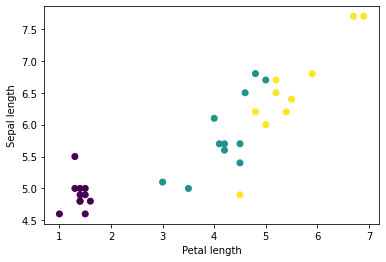

In [9]:
plt.scatter(features['petal_length'], features['sepal_length'], c = labels, cmap = 'viridis')

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [10]:
# 특성들을 단일 배열로 묶음

def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 2.4 3.3 1. ]
 [5.6 2.5 3.9 1.1]
 [5.1 3.8 1.5 0.3]
 [5.  3.6 1.4 0.2]
 [6.9 3.1 4.9 1.5]], shape=(5, 4), dtype=float32)


In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape = (4,)),
                             tf.keras.layers.Dense(10, activation=tf.nn.relu),
                             tf.keras.layers.Dense(3)
])

In [14]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.08998821, 0.38725048, 0.29686704],
       [0.07817442, 0.4289448 , 0.34715238],
       [0.14841981, 0.0149901 , 0.23051758],
       [0.1269684 , 0.0148428 , 0.22079197],
       [0.13170616, 0.55412185, 0.4580471 ]], dtype=float32)>

In [15]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.27964193, 0.37644508, 0.34391302],
       [0.26818368, 0.38086405, 0.3509522 ],
       [0.33776358, 0.29557317, 0.36666328],
       [0.33419132, 0.2987443 , 0.36706433],
       [0.25565442, 0.39003727, 0.35430834]], dtype=float32)>

In [16]:
print('예측 : {}'.format(tf.argmax(predictions, axis = 1)))
print('레이블 : {}'.format(labels))

# 훈련 전 상태로 예측이 좋지 않음

예측 : [1 1 2 2 1 2 2 2 2 1 2 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1]
레이블 : [1 1 0 0 1 0 0 0 0 2 0 0 2 2 2 2 1 0 1 1 2 0 1 0 2 1 2 2 1 0 2 2]


In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [18]:
def loss(model, x, y):
  y_ = model(x)
  return loss_object(y_true = y, y_pred = y_)

l = loss(model, features, labels)
print('손실 테스트 : {}'.format(l))

손실 테스트 : 1.0453282594680786


In [19]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [21]:
loss_value, grads = grad(model, features, labels)

print('단계 : {}, 초기 손실 : {}'.format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('단계 : {}, 손실 : {}'.format(optimizer.iterations.numpy(), loss(model, features, labels).numpy()))

단계 : 0, 초기 손실 : 1.0453282594680786
단계 : 1, 손실 : 0.9917348623275757


In [22]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  for x, y in train_dataset:
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    epoch_loss_avg(loss_value)
    epoch_accuracy(y, model(x))

  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.925, Accuracy: 65.000%
Epoch 050: Loss: 0.078, Accuracy: 96.667%
Epoch 100: Loss: 0.070, Accuracy: 96.667%
Epoch 150: Loss: 0.046, Accuracy: 99.167%
Epoch 200: Loss: 0.046, Accuracy: 99.167%


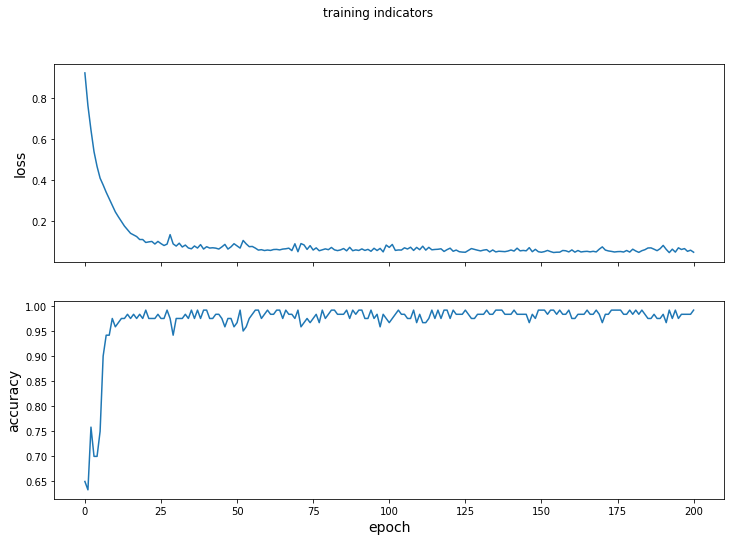

In [23]:
fig, axes = plt.subplots(2, sharex = True, figsize = (12, 8))
fig.suptitle('training indicators')

axes[0].set_ylabel('loss', fontsize = 14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('accuracy', fontsize = 14)
axes[1].set_xlabel('epoch', fontsize = 14)
axes[1].plot(train_accuracy_results)
plt.show()

In [24]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [25]:
test_dataset = tf.data.experimental.make_csv_dataset(test_fp, batch_size, column_names = column_names, label_name = 'species', num_epochs = 1, shuffle = False)

In [26]:
test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type = tf.int32)
  test_accuracy(prediction, y)

print('테스트 세트 정확도: {:.3%}'.format(test_accuracy.result()))

테스트 세트 정확도: 96.667%


In [29]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [31]:
predict_dataset = tf.convert_to_tensor([
                                        [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print('샘플 {} 예측: {} ({:4.1f}%)'.format(i, name, 100*p))

샘플 0 예측: Iris setosa (100.0%)
샘플 1 예측: Iris versicolor (99.9%)
샘플 2 예측: Iris virginica (98.2%)
